# Figure 6
## PlotGeometry Example
Adapted from https://unidata.github.io/MetPy/v1.3/examples/plots/spc_convective_outlook.html.

In [1]:
import geopandas

# get_test_data is used for internal MetPy testing and not supported publicly
from metpy.cbook import get_test_data
from metpy.plots import MapPanel, PanelContainer, PlotGeometry

Read SPC Day 1 Outlook valid 1200 UTC 17 March 2021. GeoJSON originally from SPC archive, provided as part of MetPy's internal testing data.

In [2]:
day1_outlook = geopandas.read_file(get_test_data("spc_day1otlk_20210317_1200_lyr.geojson"))

Use Declarative's PlotGeometry interfact to visualize geographic information,

In [3]:
geo = PlotGeometry()
geo.geometry = day1_outlook["geometry"]
geo.fill = day1_outlook["fill"]
geo.stroke = day1_outlook["stroke"]
geo.labels = day1_outlook["LABEL"]
geo.label_fontsize = "large"

Declarative MapPanel gives a plotting `axes` to work with Cartopy under the hood.

In [4]:
panel = MapPanel()
panel.title = " "
panel.title_fontsize = 18
panel.plots = [geo]
panel.area = [-120, -75, 25, 50]
panel.projection = "lcc"
panel.layers = ["lakes", "land", "ocean", "states", "coastline", "borders"]

Wrap it all in a figure and save to an image.

/Users/dcamron/mambaforge/envs/bams-manuscript/lib/python3.10/site-packages/metpy/plots/declarative.py:2061: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  geo_obj = max(geo_obj, key=lambda x: x.length)


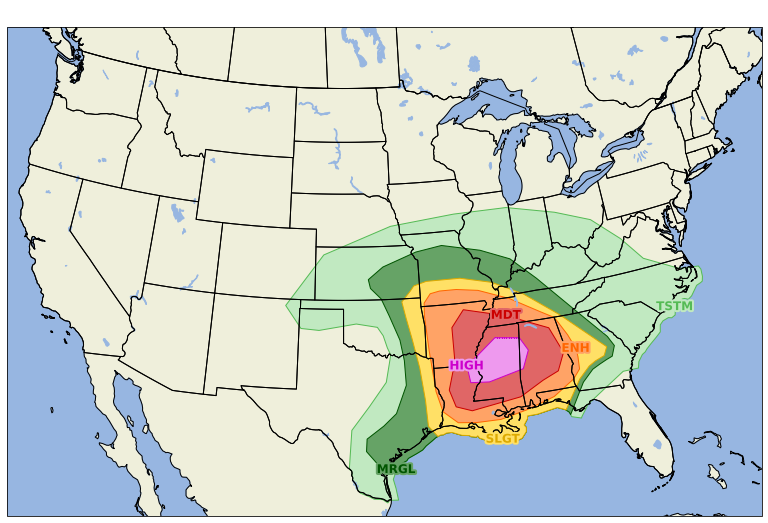

In [5]:
pc = PanelContainer()
pc.size = (18, 9)
pc.panels = [panel]
pc.save("../output/fig6_plotgeometry.png", dpi=600, bbox_inches="tight")

### Draft caption
NOAA/NWS Storm Prediction Center (SPC) March 17 2021 1200 UTC Day 1 Convective Outlook recreated using metpy.plots.PlotGeometry. PlotGeometry is provided as part of MetPy's declarative plotting interface. Data from SPC GeoJSON archive.